# CNNbasic Assignment#2

# AlexNet 구현

모델 구현 후 summary로 전체 모델 구조 출력과 주석으로 간단한 설명을 달아주시면 됩니다.

프레임워크는 자유이고, 기본 tensforflow와 pytorch tutorial 사이트를 아래에 첨부해 드립니다.

이 외 각 프레임워크 별 summary 등 추가적인 사용 방법은 구글링으로 찾아주세요!-!

- Tensorflow Tutorial: https://www.tensorflow.org/tutorials?hl=ko

- Pytorch Tutorial: https://tutorials.pytorch.kr/

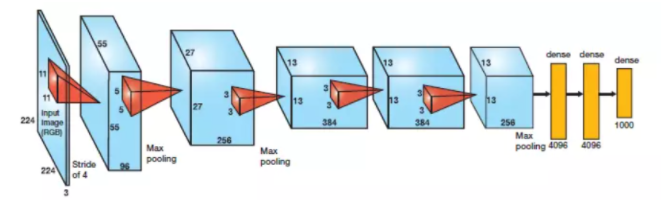


## Tensorflow(keras)

In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense, Input
from tensorflow.keras.models import Sequential


n_classes = 1000 # class 개수

model=Sequential() 

############## Add Layer ##############
model.add(Input(shape = (227,227,3))) # keras는 pytorch와 다르게 모델의 input_shape을 지정하여 넣어주어야 한다. pytorch와 다르게 channel_last 방식을 선호하여 input_shape : (227,227,3) 가 된다 
model.add(Conv2D(filters = 96, kernel_size= 11 , strides= 4, activation='relu')) # input_shape : (227,227,3)  output_shape : (55,55,96)
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2))) # overlapping input_shape : (55,55,96)  output_shape : (27,27,96)
model.add(Conv2D(filters=256, kernel_size=5, strides=1, padding='same', activation='relu'))  # input_shape : (27,27,96)  output_shape : (27,27,256)
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2))) # overlapping input_shape : (27,27,256)  output_shape : (13,13,256)
model.add(Conv2D(filters = 384, kernel_size=3 , strides=1, padding='same', activation='relu')) # input_shape : (13,13,256)  output_shape : (13,13,384)
model.add(Conv2D(filters = 384, kernel_size=3, strides=1, padding='same', activation='relu')) # input_shape : (13,13,384)  output_shape : (13,13,384)
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu')) # input_shape : (13,13,384)  output_shape : (13,13,256)
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2))) # overlapping # input_shape : (13,13,256)  output_shape : (6,6,256)
model.add(Flatten()) # input_shape : (6,6,256)  output_shape : (9216,)
model.add(Dense(4096, activation = 'relu')) # input_shape : (9216,)  output_shape : (4096,)
model.add(Dense(4096, activation = 'relu')) # input_shape : (4096,)  output_shape : (4096,)
model.add(Dense(n_classes, activation = 'softmax')) # input_shape : (4096,)  output_shape : (1000,)
#######################################

# keras summary
model.summary() # summary code 추가

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       8

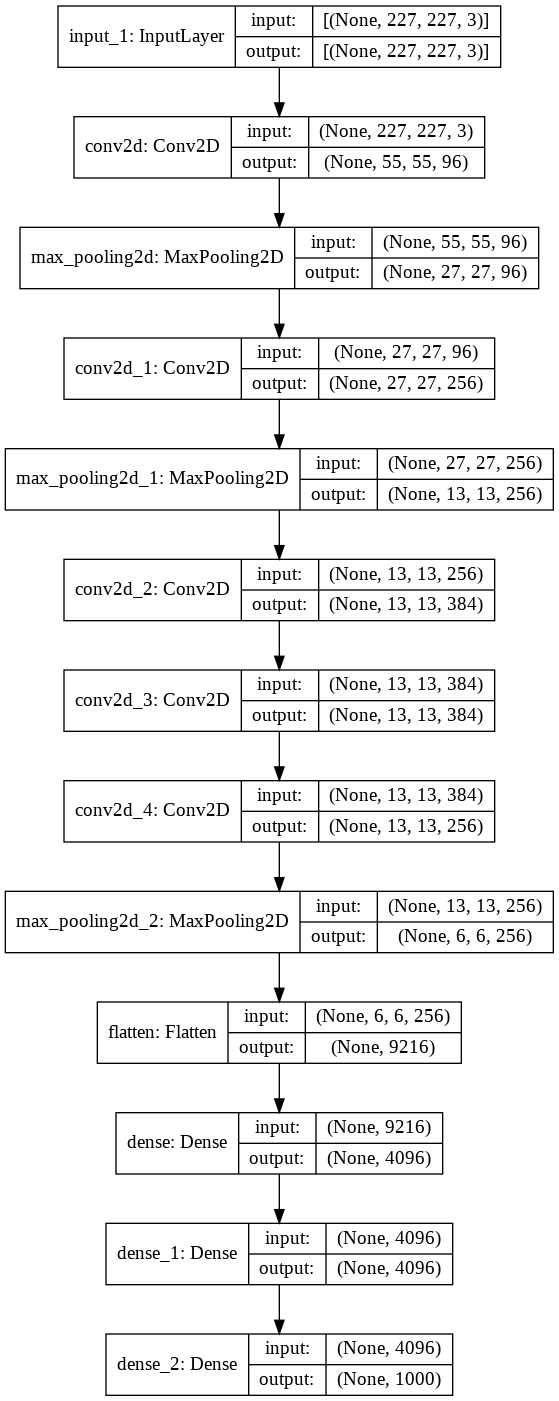

In [2]:
import tensorflow as tf 

tf.keras.utils.plot_model(model, show_shapes= True)

- 모델 구조는 5개의 Convolution layer와 3개의 Maxpooling layer를 거쳐 Flatten 한 후 FC 층을 거쳐 분류가 된다.
- 또 plot_model를 이용하면 보다 직관적으로 모델 구조를 확인 할 수 있다.
- 가중치를 확인해 보면 직접 구한 과제와 동일한 것을 확인할 수 있다.

## Pytorch

In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary


class AlexNet(nn.Module):

    def __init__(self, n_classes):
        super(AlexNet, self).__init__()
        
        self.relu = nn.ReLU(inplace = True)
        self.conv1 = nn.Conv2d(in_channels= 3, out_channels =  96, kernel_size=11, stride=4)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2)
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3,stride = 1, padding = 1)
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
        
        self.layers = nn.Sequential(
            nn.Linear(6*6*256, 4096),
            nn.ReLU(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Linear(4096, n_classes),            
        )
            
    
        #######################################

    def forward(self, x):
        x = self.relu(self.conv1(x)) # input shape : (3, 227, 227) output shape : (96, 55, 55)
        x = self.maxpool(x) # input shape : (96, 55, 55) output shape : (96, 27, 27)
        x = self.relu(self.conv2(x)) # input shape : (96, 27, 27) output shape : (256, 27, 27)
        x = self.maxpool(x) # input shape : (256, 27, 27) output shape : (256, 13, 13)
        x = self.relu(self.conv3(x)) # input shape : (256, 13, 13) output shape : (384, 13, 13)
        x = self.relu(self.conv4(x)) # input shape : (384, 13, 13) output shape : (384, 13, 13)
        x = self.relu(self.conv5(x)) # input shape : (384, 13, 13) output shape : (256, 13, 13)
        x = self.maxpool(x) # input shape : (256, 13, 13) output shape : (256, 6, 6)
        x = x.view(-1, 6*6*256) # keras의 flatten()과 같은 역할을 한다. torch.flatten(x, 1)을 사용해도 동일한 결과가 나온다. input shape : (256, 6, 6) output shape : (9216, ) 
        x = self.layers(x) # input shape : (9216, ) output shape : (1000, )
        return F.log_softmax(x, dim = 1) # softmax를 적용한 결과 


model = AlexNet(n_classes = 1000)
summary(model, input_size = (3,227,227),device = 'cpu') # pytorch는 channel_first 방식으로 위의 keras와 다르게 channel 정보를 앞에 주어 학습을 진행한다.

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
              ReLU-2           [-1, 96, 55, 55]               0
         MaxPool2d-3           [-1, 96, 27, 27]               0
            Conv2d-4          [-1, 256, 27, 27]         614,656
              ReLU-5          [-1, 256, 27, 27]               0
         MaxPool2d-6          [-1, 256, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         885,120
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]       1,327,488
             ReLU-10          [-1, 384, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         884,992
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
           Linear-14                 [-

- 모델 구조는 5개의 Convolution layer와 3개의 Maxpooling layer를 거쳐 Flatten 한 후 FC 층을 거쳐 분류가 된다.
- torch로 구현한 Alexnet 또한 위에서 keras로 구현한 모델과 같은 구조를 지닌다.
- 가중치 또한 1번과제와 동일하며 keras로 구현한 모델과 같다. 